In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**drop those columns which are not used for predictions**

In [7]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

**Encoding**

In [9]:
df['Gender']=df['Gender'].map({'M':1,'F':0})

In [10]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Series([], Name: count, dtype: int64)

**Seprate input and target**

In [13]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Now we use Feature scaling**

**StandardScaler**

In [16]:
from sklearn.preprocessing import  StandardScaler

In [17]:
scaler= StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\satya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\satya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\satya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [19]:
import numpy as np
print(np.isnan(X_train_scaled).sum())
print(np.isnan(X_test_scaled).sum())

8000
2000


In [20]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

CreditScore             0
Gender               8000
Age                     0
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Geography_Germany       0
Geography_Spain         0
dtype: int64
CreditScore             0
Gender               2000
Age                     0
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Geography_Germany       0
Geography_Spain         0
dtype: int64


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

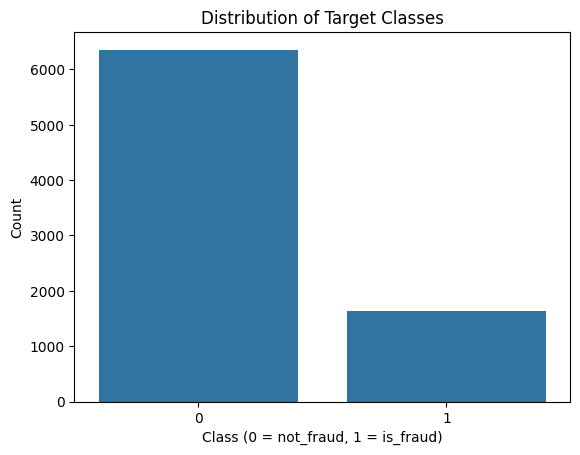

In [22]:
sns.countplot(x=y_train)
plt.title("Distribution of Target Classes")
plt.xlabel("Class (0 = not_fraud, 1 = is_fraud)")
plt.ylabel("Count")
plt.show()

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  

In [24]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

C:\Users\satya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\satya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model=LinearRegression()

In [34]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [35]:
from sklearn.metrics import accuracy_score

In [40]:
y_pred=model.predict(X_test_scaled)

**Here we are using 'y_pred>=0.5' because values of the y_pred arent '0 or 1' So we convert the probabilities to class predictions manually using a threshold (usually 0.5) so it produces binary claasification**

In [41]:
y_pred_labels = (y_pred >= 0.5).astype(int)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred_labels))

Accuracy: 0.812


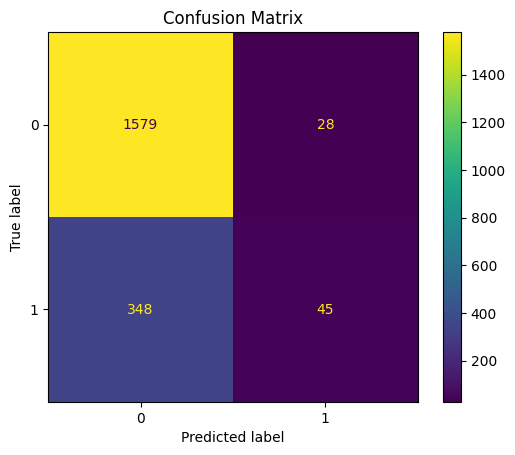

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()